In [2]:
from os import listdir, makedirs
from matplotlib import pyplot as plt
import numpy as np
from typing import List, Dict, Any

In [3]:
makedirs("output", exist_ok=True)

In [4]:
PATH = "results_runs2/runs2_res"

files = [(f"{PATH}/{f}", f) for f in listdir(PATH)]

data = {}
for f, fn in files:
    names = ".".join(fn.split(".")[:-2]).split("_")
    algo = names[2]
    gran = names[3]
    stop = names[4]
    stem = names[5]

    options = {}

    if algo == "bm25":
        options["k1"] = float(names[6][1:])
        options["b"] = float(names[7][1:])

    agp = []
    with open(f) as fd:
        lines = fd.readlines()

    for i in range(7):
        agp.append(float(lines[21 + 7 * 21].split()[2]))
    
    magp = float(lines[155].split()[2])

    data[f] = {
        "agp": agp,
        "magp": magp,
        "algo": algo,
        "gran": gran,
        "stop": stop,
        "stem": stem,
        "options": options
    }

algo_data = {}
for k, v in data.items():
    a = v["algo"]
    if a in algo_data:
        algo_data[a].append(v)
    else:
        algo_data[a] = [v]

In [5]:
algos = [a for a in algo_data]
algos

['ltc', 'ltn', 'bm25']

In [6]:
def plot_lt(algo: str):
    x = []
    y = []
    for ada in algo_data[algo]:
        stem = ada["stem"]
        stop = ada["stop"]
        magp = ada["magp"]

        x.append(magp)
        y.append(f"[{stem} / {stop}]")

    pos = np.arange(len(y))

    plt.barh(pos,
                x, 
                tick_label=y,
                align='center',
                height=0.5,
        )


## Formule LTN

$$\text{LTN}_{t,d} = 1 + \log tf_{t,d} \times \frac{N}{n}$$

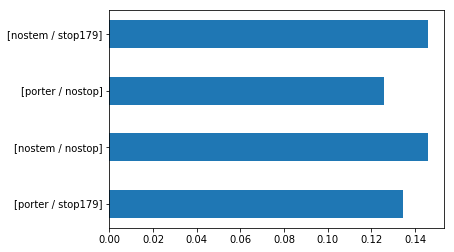

In [7]:
plot_lt("ltn")
plt.savefig("output/ltn.png",bbox_inches='tight')

## Formule LTC

$$ \text{LTC}_{t,d} = \frac{\text{LTN}_{t,d}}{\sqrt{\sum_{t'} \text{LTN}_{t',d}^2}} $$

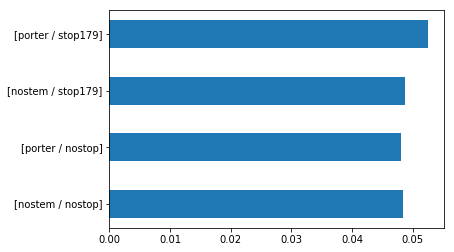

In [8]:
plot_lt("ltc")
plt.savefig("output/ltc.png",bbox_inches='tight')


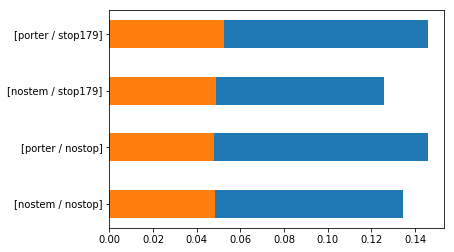

In [9]:
plot_lt("ltn")
plot_lt("ltc")
plt.savefig("output/ltntlc.png",bbox_inches='tight')


In [44]:
PATH5 = "results_runs2/runs5_res"

data5 = {}
for f, fn in ((f"{PATH5}/{f}", f) for f in listdir(PATH5)):
    # NassimThomasAntoineMelanie_1_SMART_LTN_elements_title_id_categories_revision_contributor_timestamp_username_bdy_stop179_nostem.i.txt
    # NassimThomasAntoineMelanie_2_SMART_LTN_article_stop179_porter.i.txt
    # NassimThomasAntoineMelanie_10_BM25_article_nostop_nostem_k1.2_b0.9.i.txt

    names = ".".join(fn.split(".")[:-2]).split("_")

    # merci au connard foutant des '_' dans ses putains de noms de runs.
    if names[2] == "SMART": 
        algo = "_".join(names[2:4])
        shift = 4
    else:
        algo = names[2]
        shift = 3

    gran = names[shift]
    shift += 1

    while not (names[shift] == "nostop" or names[shift].startswith("stop")):
        shift += 1

    stop = names[shift]
    stem = names[shift + 1]

    options = {}

    if algo == "bm25":
        options["k1"] = float(names[shift + 2][1:])
        options["b"] = float(names[shift + 3][1:])

    agp = []
    with open(f) as fd:
        lines = fd.readlines()

    for i in range(7):
        agp.append(float(lines[21 + 7 * 21].split()[2]))
    
    magp = float(lines[155].split()[2])

    data5[f] = {
        "agp": agp,
        "magp": magp,
        "algo": algo,
        "gran": gran,
        "stop": stop,
        "stem": stem,
        "options": options
    }

algo_data5 = {}
for k, v in data5.items():
    a = v["algo"]
    if a in algo_data5:
        algo_data5[a].append(v)
    else:
        algo_data5[a] = [v]

In [41]:
algo_data5

{'BM25': [{'agp': [0.09337959469947069,
    0.09337959469947069,
    0.09337959469947069,
    0.09337959469947069,
    0.09337959469947069,
    0.09337959469947069,
    0.09337959469947069],
   'magp': 0.17027731236742039,
   'algo': 'BM25',
   'gran': 'article',
   'stop': 'nostop',
   'stem': 'nostem',
   'options': {}},
  {'agp': [0.013033014819291215,
    0.013033014819291215,
    0.013033014819291215,
    0.013033014819291215,
    0.013033014819291215,
    0.013033014819291215,
    0.013033014819291215],
   'magp': 0.015827070070540385,
   'algo': 'BM25',
   'gran': 'article',
   'stop': 'nostop',
   'stem': 'porter',
   'options': {}},
  {'agp': [0.0951531182681902,
    0.0951531182681902,
    0.0951531182681902,
    0.0951531182681902,
    0.0951531182681902,
    0.0951531182681902,
    0.0951531182681902],
   'magp': 0.15569566263808385,
   'algo': 'BM25',
   'gran': 'article',
   'stop': 'stop179',
   'stem': 'nostem',
   'options': {}},
  {'agp': [0.013033014819291215,
    0.

In [46]:
def plot_lt5(algo: str):
    x = []
    y = []
    for ada in algo_data5[algo]:
        stem = ada["stem"]
        stop = ada["stop"]
        magp = ada["magp"]
        gran = ada["gran"]

        x.append(magp)
        y.append(f"[{stem} / {stop} / {gran}]")

    pos = np.arange(len(y))

    plt.barh(pos,
                x, 
                tick_label=y,
                align='center',
                height=0.5,
        )


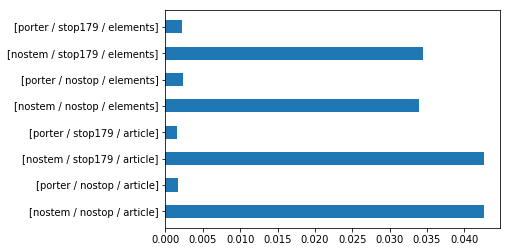

In [52]:
plot_lt5("SMART_LTN")
plt.savefig("output/ltn_elem.png",bbox_inches='tight')

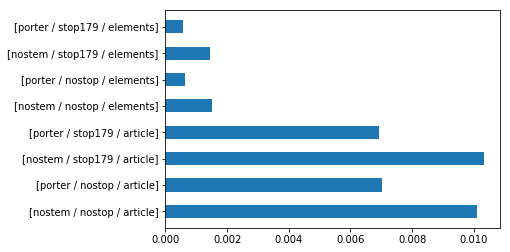

In [51]:
plot_lt5("SMART_LTC")
plt.savefig("output/ltc_elem.png",bbox_inches='tight')